In [1]:
%load_ext autoreload
%autoreload 2

# Import plot functions from parent directory
import sys
sys.path.append('..')
sys.path.append('../..')
from plot_training_progress import plot_progress_curve, load_progress_log
from analysis_runner import prepare_variant_file, analysis, deep_update_dict

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.facecolor'] = 'white'
plt.rc('figure', facecolor='w')
plt.rcParams.update({'font.size':20})

In [3]:
import copy

base_config = dict(
    path_to_weights = None,
    save_dir = None,
    showcase_itr = None,
    util_params=dict(
        base_log_dir='.temp',  # name of output directory
        use_gpu=True,  # set True if GPU available and should be used
        use_multiprocessing=False,  # set True if data collection should be parallelized across CPUs
        gpu_id=0,  # number of GPU if machine with multiple GPUs
    ),
    analysis_params=dict(
        train_example_cases=[],
        example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
        single_episode_plots=[],
        multiple_episode_plots=[['time_vs_specification', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        plot_encoding=False,  # CONFIGURE! If True: plots encoding for showcase_itr
        log_and_plot_progress=False,
        save=False,  # CONFIGURE! If True: plots of following options will be saved to the experiment folder
        show=False,
        manipulate_time_steps=False,  # CONFIGURE! If True: uses time_steps different recent context, as specified below
        manipulate_change_trigger=False,  # CONFIGURE! for non-stationary envs: change the trigger for task changes
        manipulate_max_path_length=False,  # CONFIGURE! change max_path_length to value specified below
        manipulate_test_task_number=False,  # CONFIGURE! change test_task_number to value specified below
        visualize_run=False,  # CONFIGURE! If True: learned policy of the showcase_itr will be played on example_case
    ),
    env_params=dict(),
    algo_params=dict(
        use_fixed_seeding=True,
        seed=0,
    ),
    reconstruction_params=dict()
)

# Difference between cheetah-velocity and cheetah-target

2022-02-04 09:49:03.858410 CET | [2022_02_04_08_39_39] [2022_02_04_08_39_43] [2022_02_04_08_41_50] [2022_02_04_09_48_50] Variant:
2022-02-04 09:49:03.859710 CET | [2022_02_04_08_39_39] [2022_02_04_08_39_43] [2022_02_04_08_41_50] [2022_02_04_09_48_50] {
  "env_name": "cheetah-stationary-vel",
  "env_params": {
    "n_train_tasks": 100,
    "n_eval_tasks": 30,
    "use_normalized_env": true,
    "scripted_policy": false,
    "use_state_decoder": true,
    "change_mode": "location",
    "change_point_interval": 1,
    "negative_change_point_basis": -1000000,
    "positive_change_point_basis": 1000000,
    "state_reconstruction_clip": 8,
    "task_max_target": 25.0,
    "task_min_target": -25.0,
    "termination_possible": false,
    "task_max_velocity": 3.0,
    "task_min_velocity": 0.0
  },
  "path_to_weights": "../../output/cheetah-stationary-vel/2022_01_26_01_21_15",
  "train_or_showcase": "train",
  "showcase_itr": 400,
  "util_params": {
    "base_log_dir": ".temp",
    "temp_dir": "

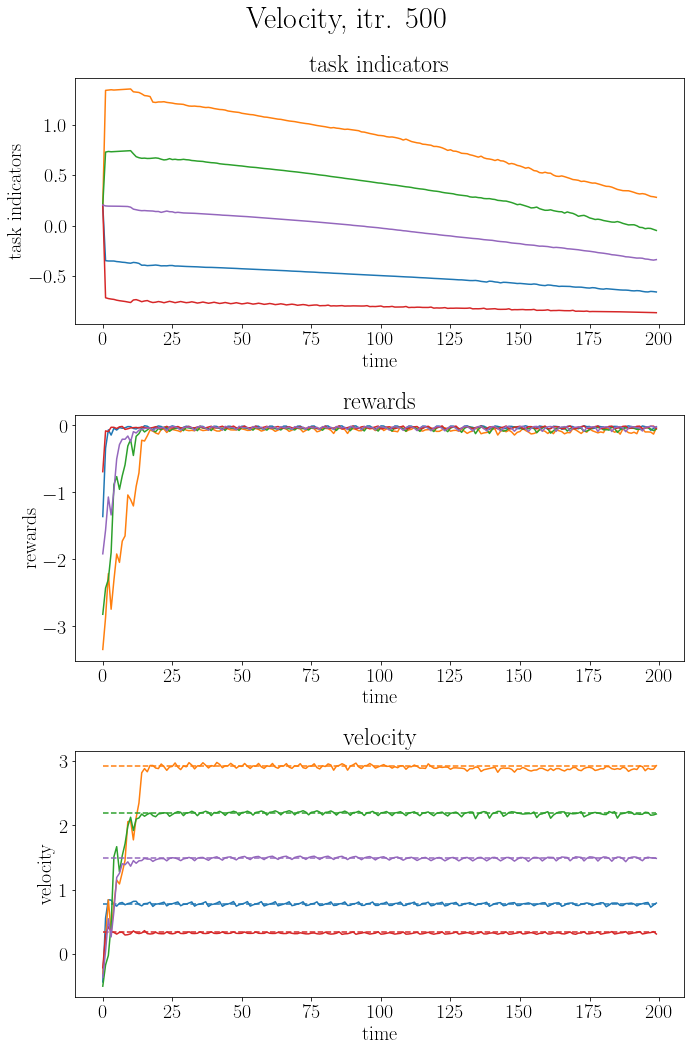

In [8]:
cheetah_vel_config = copy.deepcopy(base_config)
cheetah_vel_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-vel/2022_01_26_01_21_15',
        showcase_itr=400,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_task_indicators', 'time_vs_rewards', 'time_vs_velocity_const_specification'],],
        )
    ),
    cheetah_vel_config
)

cheetah_vel_config = prepare_variant_file(cheetah_vel_config)
fig, ax = analysis(cheetah_vel_config)
fig.suptitle('Velocity, itr. 500', size=30)
fig.tight_layout()

2022-02-03 19:22:10.560789 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] Variant:
2022-02-03 19:22:10.563464 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [

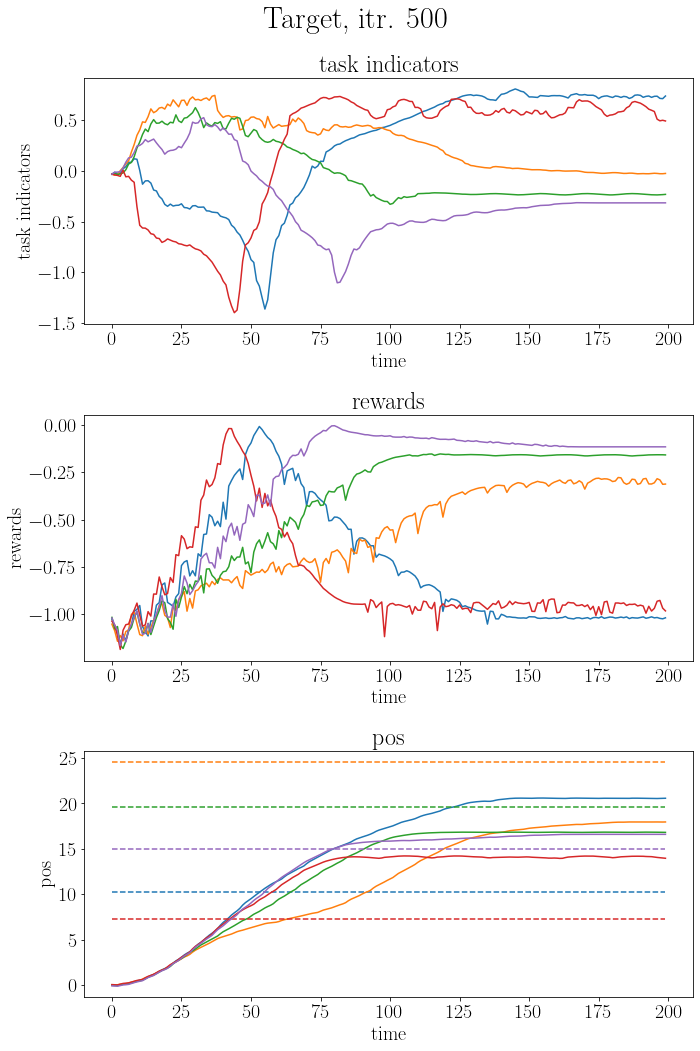

In [55]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-normalizedReward/2022_01_27_01_29_20',
        showcase_itr=500,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_task_indicators', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Target, itr. 500', size=30)
fig.tight_layout()

# What info is sufficient?

2022-02-03 19:23:17.166176 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] [2022_02_03_19_22_10] Variant:
2022-02-03 19:23:17.168887 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [

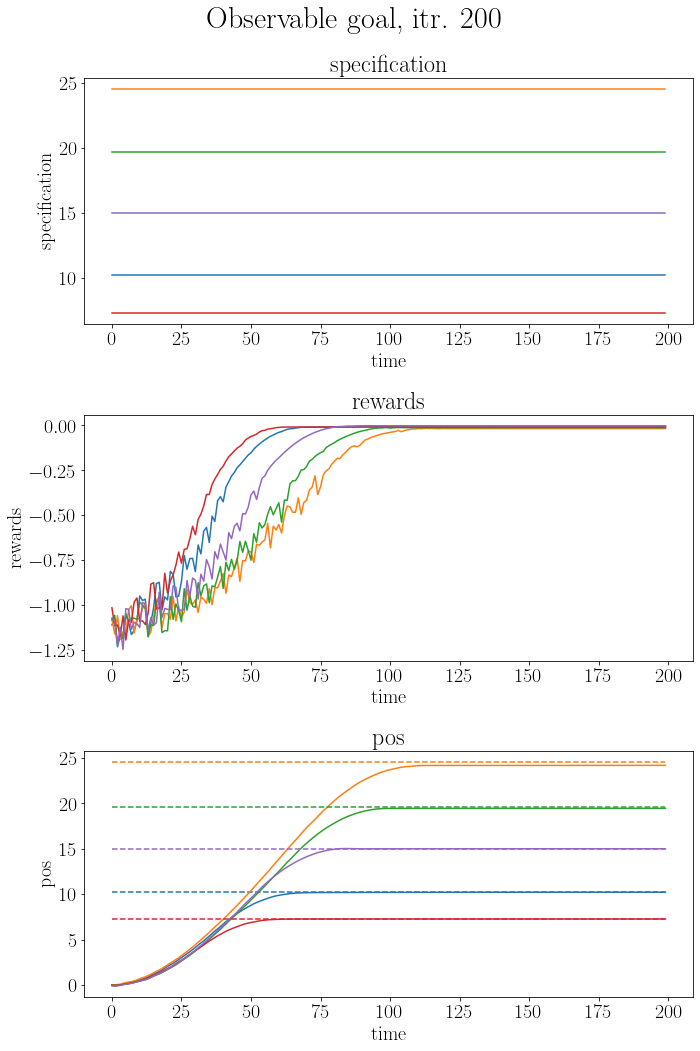

In [56]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-normalizedReward-observable-goal/2022_01_27_14_29_22',
        showcase_itr=200,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_specification', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Observable goal, itr. 200', size=30)
fig.tight_layout()

2022-02-03 19:23:22.460547 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] [2022_02_03_19_22_10] [2022_02_03_19_23_17] Variant:
2022-02-03 19:23:22.463091 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [

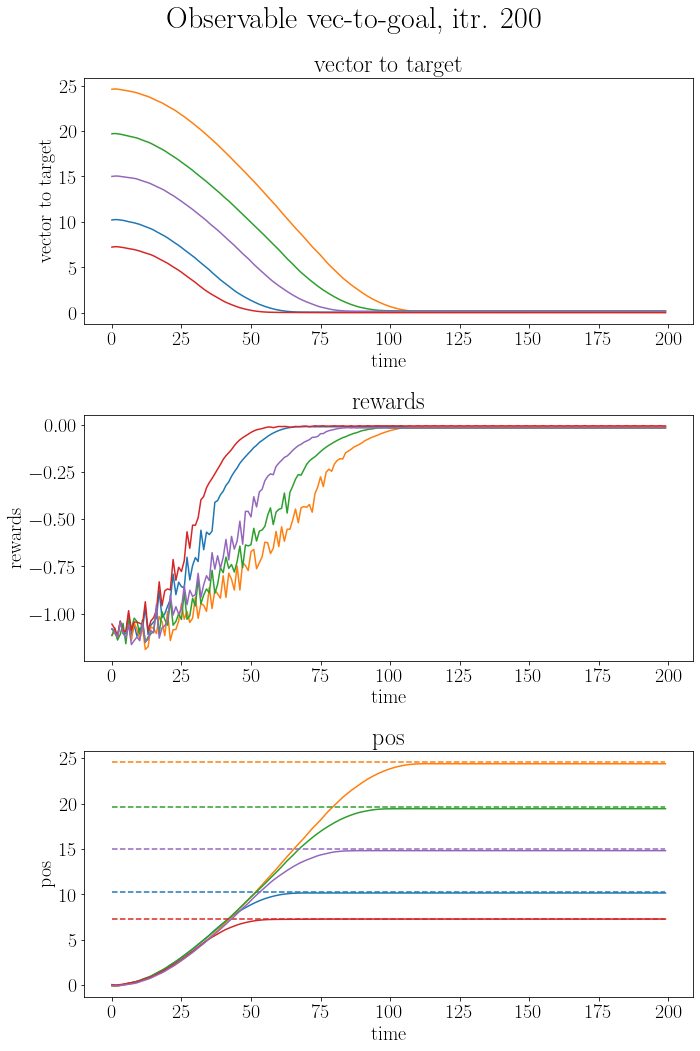

In [57]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-normalizedReward-observable-vecToGoal/2022_01_27_14_35_41',
        showcase_itr=200,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_vector_to_target', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Observable vec-to-goal, itr. 200', size=30)
fig.tight_layout()

2022-02-03 19:26:49.885281 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] [2022_02_03_19_22_10] [2022_02_03_19_23_17] [2022_02_03_19_23_22] [2022_02_03_19_23_28] [2022_02_03_19_26_04] Variant:
2022-02-03 19:26:49.888203 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [

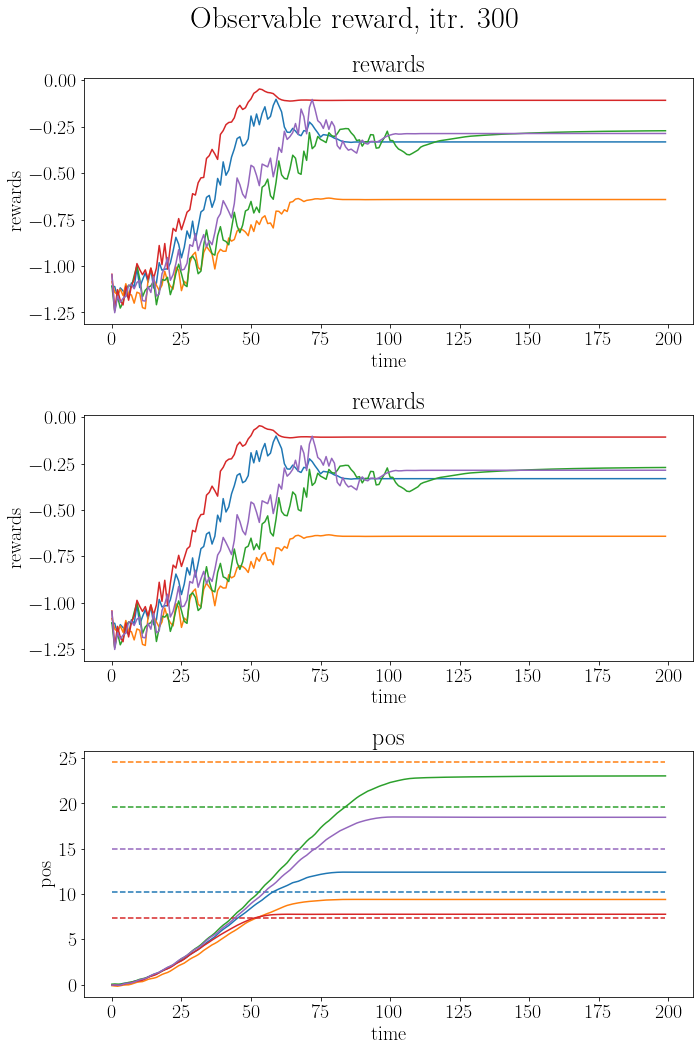

In [60]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-normalizedReward-observable-reward/2022_01_27_18_16_41',
        showcase_itr=300,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_rewards', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Observable reward, itr. 300', size=30)
fig.tight_layout()

# Partial success with full window reconstruction

2022-02-03 19:32:53.141823 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] [2022_02_03_19_22_10] [2022_02_03_19_23_17] [2022_02_03_19_23_22] [2022_02_03_19_23_28] [2022_02_03_19_26_04] [2022_02_03_19_26_49] [2022_02_03_19_30_46] [2022_02_03_19_30_49] Variant:
2022-02-03 19:32:53.144951 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [

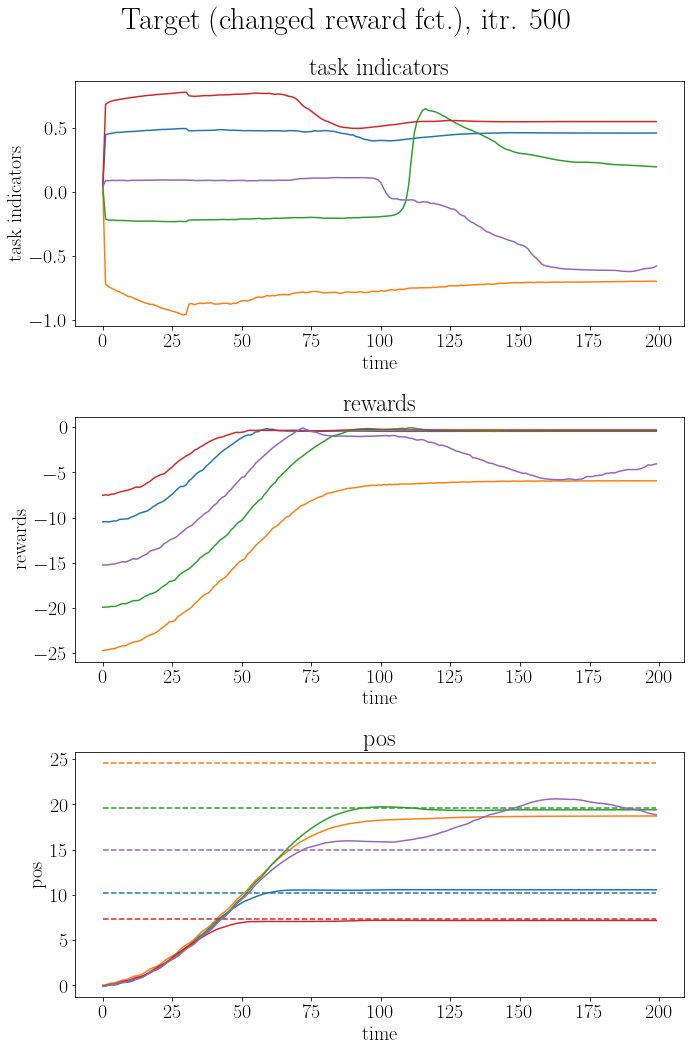

In [64]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-allT/2022_02_01_17_28_27',
        showcase_itr=350,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_task_indicators', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Target (changed reward fct.), itr. 500', size=30)
fig.tight_layout()

2022-02-03 19:30:49.840620 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [2022_02_03_18_32_54] [2022_02_03_18_34_24] [2022_02_03_18_34_35] [2022_02_03_18_34_45] [2022_02_03_18_35_19] [2022_02_03_18_36_39] [2022_02_03_18_37_44] [2022_02_03_18_37_51] [2022_02_03_18_38_05] [2022_02_03_18_38_20] [2022_02_03_18_40_16] [2022_02_03_18_40_53] [2022_02_03_18_42_05] [2022_02_03_18_44_45] [2022_02_03_18_44_54] [2022_02_03_18_46_48] [2022_02_03_18_47_42] [2022_02_03_18_48_07] [2022_02_03_18_48_34] [2022_02_03_18_57_41] [2022_02_03_18_59_07] [2022_02_03_19_00_22] [2022_02_03_19_00_38] [2022_02_03_19_01_40] [2022_02_03_19_02_10] [2022_02_03_19_22_10] [2022_02_03_19_23_17] [2022_02_03_19_23_22] [2022_02_03_19_23_28] [2022_02_03_19_26_04] [2022_02_03_19_26_49] [2022_02_03_19_30_46] Variant:
2022-02-03 19:30:49.843502 CET | [2022_02_03_18_27_15] [2022_02_03_18_28_30] [2022_02_03_18_28_56] [2022_02_03_18_31_20] [2022_02_03_18_31_37] [

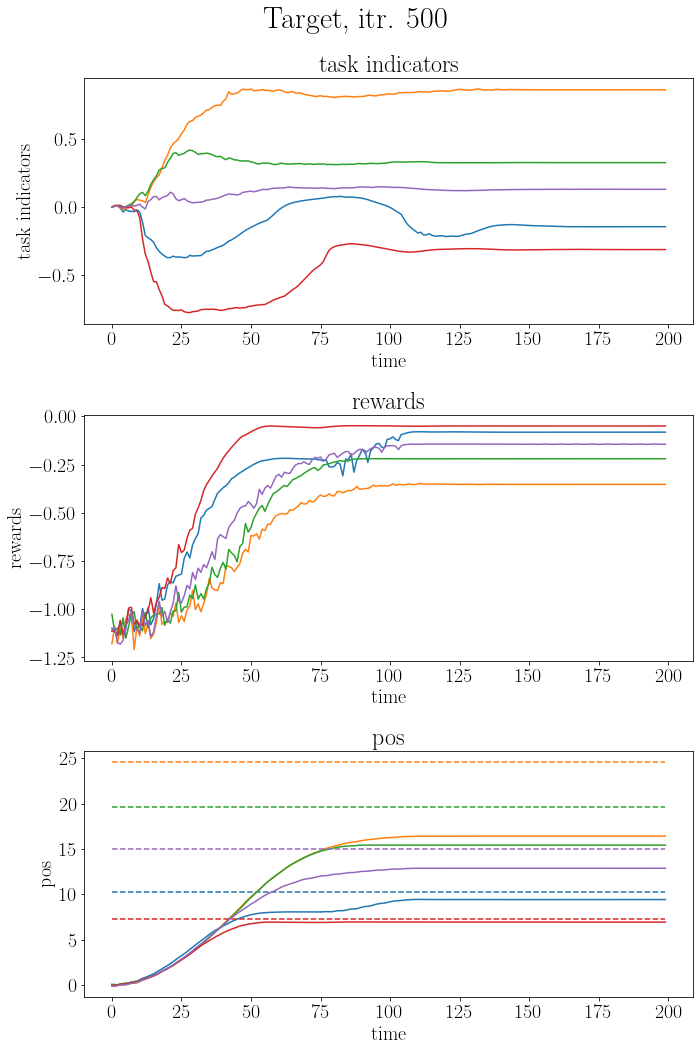

In [63]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-normalizedReward-allT/2022_02_01_17_35_30',
        showcase_itr=450,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_task_indicators', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Target, itr. 500', size=30)
fig.tight_layout()

# Comparison reward function

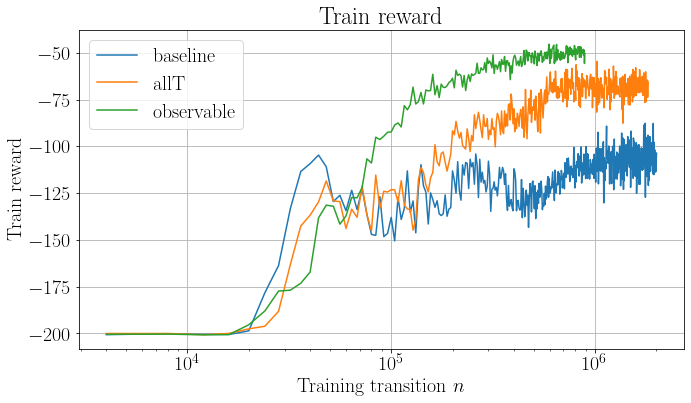

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data_base = load_progress_log('../../output/cheetah-stationary-target-normalizedReward/2022_01_27_01_29_20')
data_allT = load_progress_log('../../output/cheetah-stationary-target-normalizedReward-allT/2022_02_01_17_35_30')
data_obs = load_progress_log('../../output/cheetah-stationary-target-normalizedReward-observable-goal/2022_01_27_14_29_22')
plot_progress_curve(data_base, 'train_avg_reward', fig_ax=(fig, ax))
plot_progress_curve(data_allT, 'train_avg_reward', fig_ax=(fig, ax))
plot_progress_curve(data_obs, 'train_avg_reward', fig_ax=(fig, ax))

ax.legend(['baseline', 'allT', 'observable'])
fig.tight_layout()

# Twosided targets

2022-02-04 08:41:50.253723 CET | [2022_02_04_08_39_39] [2022_02_04_08_39_43] Variant:
2022-02-04 08:41:50.254827 CET | [2022_02_04_08_39_39] [2022_02_04_08_39_43] {
  "env_name": "cheetah-stationary-target-twosided-allT",
  "env_params": {
    "n_train_tasks": 100,
    "n_eval_tasks": 30,
    "use_normalized_env": true,
    "scripted_policy": false,
    "use_state_decoder": true,
    "change_mode": "location",
    "change_point_interval": 1,
    "negative_change_point_basis": -1000000,
    "positive_change_point_basis": 1000000,
    "state_reconstruction_clip": 8,
    "task_max_target": 25.0,
    "task_min_target": -25.0,
    "termination_possible": false
  },
  "path_to_weights": "../../output/cheetah-stationary-target-twosided-allT/2022_02_03_18_14_39",
  "train_or_showcase": "train",
  "showcase_itr": 500,
  "util_params": {
    "base_log_dir": ".temp",
    "temp_dir": ".temp_cemrl",
    "use_gpu": true,
    "use_multiprocessing": false,
    "num_workers": 8,
    "gpu_id": 0,
    "d

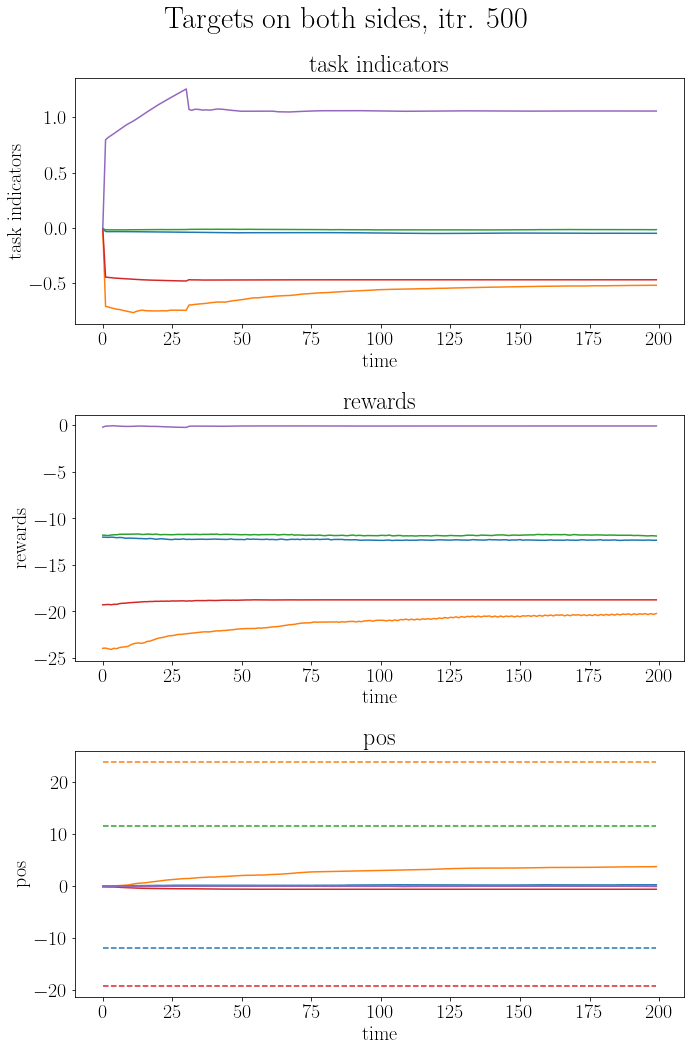

In [6]:
cheetah_target_config = copy.deepcopy(base_config)
cheetah_target_config = deep_update_dict(
    dict(
        path_to_weights='../../output/cheetah-stationary-target-twosided-allT/2022_02_03_18_14_39',
        showcase_itr=500,
        analysis_params=dict(
            example_cases=[6, 7, 8, 9, 24, ],  # CONFIGURE! choose an array of test tasks
            multiple_episode_plots=[['time_vs_task_indicators', 'time_vs_rewards', 'time_vs_pos_const_specification'],],
        )
    ),
    cheetah_target_config
)

cheetah_target_config = prepare_variant_file(cheetah_target_config)
fig, ax = analysis(cheetah_target_config)
fig.suptitle('Targets on both sides, itr. 500', size=30)
fig.tight_layout()